<a href="https://colab.research.google.com/github/tillaczel/Machine-learning-workshop/blob/master/Numpy_linear_classification_exercise_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear classification
Build a neural network, which can classify lineary separable data. The classifier should be a logistic regression with a treshold of 0.5. Use MSE for the loss function. Complete the code in the 'TASK: defining the neural network' section.


## Importing libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Defineing visualization

In [0]:
def vis(X,Y,title):
    fig = plt.figure(figsize=(8,8))
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.title(title)
    plt.show()

## TASK: Defineing the neural network

In [0]:
class neuron():

    def __init__(self,learning_rate):
        self.learning_rate = learning_rate

        self.w1 = np.random.randn(1)
        self.w2 = np.random.randn(1)
        self.b = np.random.randn(1)

    def predict(self,X):
        z = self.w1*X[:,0]+self.w2*X[:,1]+self.b
        return 1/(1+np.exp(-z))

    def train(self,X,Y,epoch):
        for e in range(epoch):           
            z = self.w1*X[:,0]+self.w2*X[:,1]+self.b
            g = 1/(1+np.exp(-z))
            
            if e % 100 == 0:
                print(f'Epoch: {e}, error: {np.mean((g-Y)**2)}')

            dg = g-Y
            dz = dg*g*(1-g)
            dw1 = np.mean(dz*X[:,0])
            dw2 = np.mean(dz*X[:,1])
            db = np.mean(dz)
            self.w1 += -learning_rate*dw1
            self.w2 += -learning_rate*dw2
            self.b += -learning_rate*db

## Training the model

In [0]:
learning_rate = 0.01
model = neuron(learning_rate)

Creating the data and saving the prediction of the initialized model.

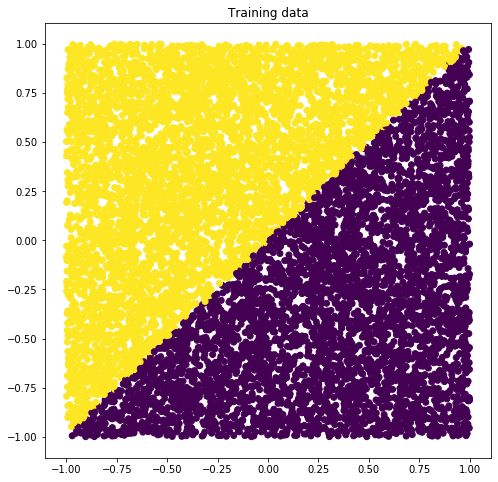

In [0]:
X = np.random.rand(10000,2)*2-1
Y = np.clip((X[:,1]-X[:,0])*np.inf,0,1)
vis(X, Y, 'Training data')
old_model_prediction = model.predict(X)

Training the network and visualizing the resutls

Epoch: 0, error: 0.3563404804637492
Epoch: 100, error: 0.3478711408474388
Epoch: 200, error: 0.3394236996711899
Epoch: 300, error: 0.3310244017272102
Epoch: 400, error: 0.3226994137221337
Epoch: 500, error: 0.3144742915941163
Epoch: 600, error: 0.30637346024485124
Epoch: 700, error: 0.2984197326205361
Epoch: 800, error: 0.29063389234214904
Epoch: 900, error: 0.28303435907149926
Epoch: 1000, error: 0.27563694916024434
Epoch: 1100, error: 0.26845473673546794
Epoch: 1200, error: 0.2614980131471242
Epoch: 1300, error: 0.2547743364434104
Epoch: 1400, error: 0.24828865781573153
Epoch: 1500, error: 0.242043509036342
Epoch: 1600, error: 0.23603923378500558
Epoch: 1700, error: 0.23027424618804593
Epoch: 1800, error: 0.2247453014988143
Epoch: 1900, error: 0.21944776620922893
Epoch: 2000, error: 0.21437587759755103
Epoch: 2100, error: 0.20952298545838666
Epoch: 2200, error: 0.20488177128930132
Epoch: 2300, error: 0.20044444237907275
Epoch: 2400, error: 0.19620289998981902
Epoch: 2500, error: 0.19

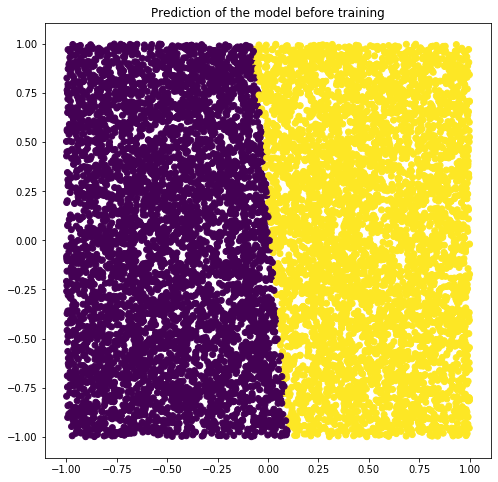

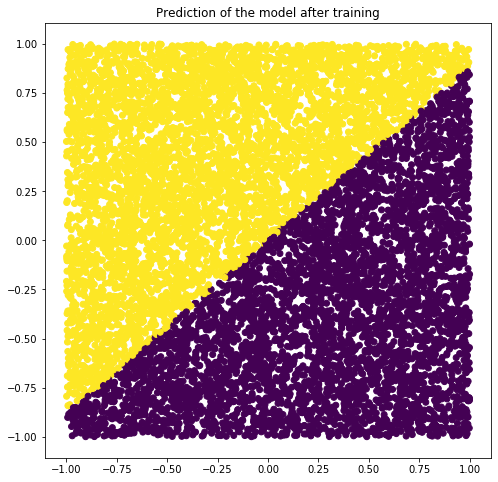

In [0]:
model.train(X,Y,10000)
vis(X, np.round(old_model_prediction), 'Prediction of the model before training')
vis(X, np.round(model.predict(X)), 'Prediction of the model after training')